In [1]:
!pip install langchain langgraph cassio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.4/404.4 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.0/378.0 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58

#Connect to Astradb

In [2]:
import cassio

#Connect to Astradb
ASTRA_DB_APP_TOKEN="AstraCS:MZdNODbjiHcdMnorUMuyrJDT:173239f50bcee22bed7f8c5755bf504182632369bebbfbcc2dd4d7d3d222d5b1"
ASTRA_DB_ID="f14ef5ab-5be0-46ca-b704-72d0d8f9483e"

cassio.init(database_id=ASTRA_DB_ID,token=ASTRA_DB_APP_TOKEN)

In [3]:
!pip install langchain_community langchain_groq langchainhub tiktoken langchain_huggingface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.2/255.2 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.5 MB/s eta 0:00:00


#Setup document loaders

In [4]:
from langchain_community.document_loaders import WebBaseLoader
from langchain.text_splitter import  RecursiveCharacterTextSplitter

#Docs to read
urls=[
    "https://colah.github.io/posts/2015-08-Understanding-LSTMs/",
    "https://colah.github.io/posts/2014-10-Visualizing-MNIST/",
    "https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/",

]

#Load the data from these urls and split them into chunks
docs = [WebBaseLoader(url).load() for url in urls]
docs_list = [item for sublist in docs for item in sublist]
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=500, chunk_overlap=0)
docs_split = text_splitter.split_documents(docs_list)


In [5]:
docs_split

[Document(metadata={'source': 'https://colah.github.io/posts/2015-08-Understanding-LSTMs/', 'title': "Understanding LSTM Networks -- colah's blog", 'language': 'en'}, page_content="Understanding LSTM Networks -- colah's blog\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nToggle navigation\n\n\n\n\ncolah's blog\n\n\n\n\n  Blog\n  About\n  Contact\n\n\n\n\n\n\n\n\nUnderstanding LSTM Networks\n\nPosted on August 27, 2015\n\n\n\nRecurrent Neural Networks\nHumans don’t start their thinking from scratch every second. As you read this essay, you understand each word based on your understanding of previous words. You don’t throw everything away and start thinking from scratch again. Your thoughts have persistence.\nTraditional neural networks can’t do this, and it seems like a major shortcoming. For example, imagine you want to classify what kind of event is happening at every point in a movie. It’s unclear how a traditional neural network could use its reasoning about previous e

#Define the HuggingFace embedding layer

In [6]:
from langchain_huggingface import HuggingFaceEmbeddings

#Define the embedding layer
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

#Perform vector embedding for the docs and store them in Astradb

In [7]:
from langchain.vectorstores import Cassandra

astra_vectorstore = Cassandra(
    embedding=embeddings,
    session=None,
    keyspace=None,
    table_name="test_database",
)

In [8]:
from langchain.indexes.vectorstore import VectorStoreIndexWrapper

#add embedding docs to astradb
astra_vectorstore.add_documents(docs_split)
print(f"Inserted {len(docs_split)} records")

#Define vectordb tool
astra_vector_index = VectorStoreIndexWrapper(vectorstore=astra_vectorstore)

Inserted 62 records


In [9]:
retriever = astra_vectorstore.as_retriever()

retriever.invoke("what is LSTM")

[Document(metadata={'language': 'en', 'source': 'https://colah.github.io/posts/2015-08-Understanding-LSTMs/', 'title': "Understanding LSTM Networks -- colah's blog"}, page_content='Don’t worry about the details of what’s going on. We’ll walk through the LSTM diagram step by step later. For now, let’s just try to get comfortable with the notation we’ll be using.\n\n\n\nIn the above diagram, each line carries an entire vector, from the output of one node to the inputs of others. The pink circles represent pointwise operations, like vector addition, while the yellow boxes are learned neural network layers. Lines merging denote concatenation, while a line forking denote its content being copied and the copies going to different locations. \nThe Core Idea Behind LSTMs\nThe key to LSTMs is the cell state, the horizontal line running through the top of the diagram.\nThe cell state is kind of like a conveyor belt. It runs straight down the entire chain, with only some minor linear interactions

#Define the Router function using Langgraph

In [10]:
from typing import Literal,TypedDict
from typing_extensions import List

from langchain.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
#Data Model
class RouteQuery(BaseModel):
  """Route the user query to most relevant datasource"""
  datasource:Literal["vectorstore","wiki_search"] = Field(description="Given a user question choose to route it to vectorstore or wikipedia")


#Define LLM model Using ChatGroq

In [14]:
from langchain_groq import ChatGroq
from google.colab import userdata

groq_api_key = userdata.get('GROQ_API_KEY')

llm = ChatGroq(groq_api_key=groq_api_key,model_name="gemma2-9b-it")

In [15]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7984e1fc06d0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7984e1fc1390>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [16]:
#Integrating routequery with llm model
structured_llm_router = llm.with_structured_output(RouteQuery)

#Define the chatprompt template

In [17]:
system = """ You are an expert at routing a user question to a vectorstore or wikipedia.
The vectorstore contains documents related to Understanding LSTMs, Visualizing data using TSNE and Adversarial attacks on LLMs.
Use the vectorstore for these topics else use wikipedia search"""

route_prompt = ChatPromptTemplate.from_messages([
    ("system", system),
    ("human", "{question}")
])

question_router = route_prompt | structured_llm_router

In [20]:
print(question_router.invoke({"question":"what epochs should I use for training?"}))

datasource='vectorstore'


In [21]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=3bfe5bdd9f7683fbdab0a83fd131c52af1140f8c45b96666c1977c731ce16155
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [23]:
#Setup wikipedia tool
from langchain_community.utilities import WikipediaAPIWrapper
from langchain_community.tools import WikipediaQueryRun

wiki_wrapper = WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=200)
wiki = WikipediaQueryRun(api_wrapper=wiki_wrapper)

#Create MultiAI Agents using LangGraph

In [24]:
#Manages the state of all AI agents
class GraphState(TypedDict):
  """
  Represents the state of graph

  Attributes:
     question:question
     generation:llm generation
     documents:list of documents
  """
  question:str
  generation:str
  documents:List[str]

In [25]:
from langchain.schema import Document


def retrieve(state:GraphState) -> GraphState:
  """
  Retrieve Documents
  Args : current graph state
  """
  print("--Retrive--")
  question=state["question"]
  print(question)

  #Retrieval
  documents = retriever.invoke(question)
  return {"documents":documents,"question":question}
#

In [26]:
def wiki_search(state:GraphState) -> GraphState:
  """
  Retrieve Documents
  Args : current graph state
  """
  print("--Wikipedia--")
  question=state["question"]
  print(question)
  #Retrieval
  documents = wiki.invoke(question)
  wiki_results = documents
  wiki_results = Document(page_content=wiki_results)
  return {"documents":wiki_results,"question":question}
#

In [27]:
def route_question(state:GraphState) -> GraphState:
  """
  Retrieve Documents
  Args : current graph state
  """
  print("--Route question--")
  question=state["question"]
  source = question_router.invoke({"question":question})
  if source.datasource == "vectorstore":
    print("--Route to VectorStore")
    return "vectorstore"
  elif source.datasource == "wiki_search":
    print("---Route to Wikipedia")
    return "wiki_search"

#

#Make Nodes and Edges for the LangGraph

In [28]:
from langgraph.graph import StateGraph,START,END

workflow = StateGraph(GraphState)

#Define nodes
workflow.add_node("wiki_search",wiki_search)
workflow.add_node("retrieve",retrieve)

#Build the graph
workflow.add_conditional_edges(
    START,
    route_question,
    {
        "wiki_search":"wiki_search",
        "vectorstore":"retrieve",
    },
)

workflow.add_edge("retrieve",END)
workflow.add_edge("wiki_search",END)

app = workflow.compile()

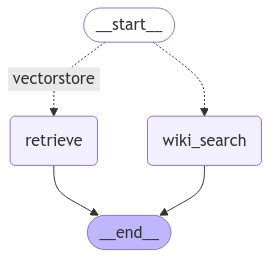

In [30]:
#print the app
from IPython.display import Image, display

try:
  display(Image(app.get_graph().draw_mermaid_png()))
except:
  pass

In [49]:
from pprint import pprint

inputs = {"question":"Who is attack on LLMs"}


for output in app.stream(inputs):
  for key,value in output.items():
    print(f"{key}:{value}")

  # Access the page_content attribute directly instead of subscripting
  pprint(value['documents'][0])

--Route question--


--Route to VectorStore
--Retrive--
Who is attack on LLMs
retrieve:{'question': 'Who is attack on LLMs', 'documents': [Document(metadata={'description': 'The use of large language models in the real world has strongly accelerated by the launch of ChatGPT. We (including my team at OpenAI, shoutout to them) have invested a lot of effort to build default safe behavior into the model during the alignment process (e.g. via RLHF). However, adversarial attacks or jailbreak prompts could potentially trigger the model to output something undesired.\nA large body of ground work on adversarial attacks is on images, and differently it operates in the continuous, high-dimensional space.', 'language': 'en', 'source': 'https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/', 'title': "Adversarial Attacks on LLMs | Lil'Log"}, page_content="Adversarial Attacks on LLMs | Lil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n